In [2]:
import pandas as pd

In [15]:
#Dataset 1
complaints_df = pd.read_csv('./Data/Complaints/complaints.csv')
complaints_df.head()
complaint_df = complaints_df['Consumer complaint narrative']
complaint_df = complaint_df.dropna().reset_index(drop=True)
print(complaint_df.head())
print(len(complaint_df))

0    I contacted Ally on Friday XX/XX/XXXX after fa...
1    Hello This complaint is against the three cred...
2    I am a victim of Identity Theft & currently ha...
3    Two accounts are still on my credit history af...
4    Receiving daily telephone call ( s ) from XXXX...
Name: Consumer complaint narrative, dtype: object
809343


In [18]:
#Dataset 2
complaints_df = pd.read_csv('./Data/Comcast_Consumer_Complaints/comcast_consumeraffairs_complaints.csv')
complaints_df.head()
complaint_df = complaints_df['text']
complaint_df = complaint_df.dropna().reset_index(drop=True)
complaints_df_2 = pd.read_csv('./Data/Comcast_Consumer_Complaints/comcast_fcc_complaints_2015.csv')
complaint_temp_df = complaints_df_2['Description']
complaint_temp_df = complaint_temp_df.dropna().reset_index(drop=True)
complaint_df = complaint_df.append(complaint_temp_df)

/var/folders/p3/s4n39zb50rb2l96w9n054ch80000gn/T/ipykernel_1678/443510578.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  complaint_df = complaint_df.append(complaint_temp_df)


In [10]:
#Dataset 1
# Load the regular expression library
import re

# Remove punctuation
complaint_df = complaint_df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
complaint_df= complaint_df.map(lambda x: x.lower())

# Print out the first rows of papers
complaint_df.head()

0    i contacted ally on friday xx/xx/xxxx after fa...
1    hello this complaint is against the three cred...
2    i am a victim of identity theft & currently ha...
3    two accounts are still on my credit history af...
4    receiving daily telephone call ( s ) from xxxx...
Name: Consumer complaint narrative, dtype: object

In [19]:
#Dataset 2
# Load the regular expression library
import re

# Remove punctuation
complaint_df = complaint_df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
complaint_df= complaint_df.map(lambda x: x.lower())

# Print out the first rows of papers
complaint_df.head()

0    i used to love comcast until all these constan...
1    i'm so over comcast the worst internet provide...
2    if i could give them a negative star or no sta...
3    i've had the worst experiences so far since in...
4    check your contract when you sign up for comca...
dtype: object

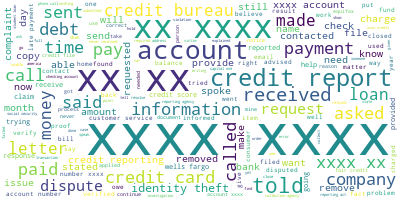

In [12]:
#Dataset 1
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(complaint_df.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

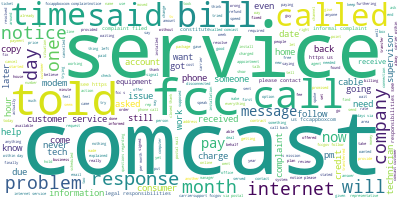

In [20]:
#Dataset 2
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(complaint_df.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [13]:
#Dataset 1
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = complaint_df.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

/Users/sajjadislam/opt/anaconda3/envs/py_venv_complain/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sajjadislam/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['contacted', 'ally', 'friday', 'xx', 'xx', 'xxxx', 'falling', 'behind', 'payments', 'due', 'work', 'short', 'period', 'time', 'due', 'illness', 'chated', 'representative', 'logging', 'account', 'regarding', 'opitions', 'ensure', 'protect', 'credit', 'bring', 'account', 'current', 'advised', 'extenstion']


In [21]:
#Dataset 2
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = complaint_df.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sajjadislam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['used', 'love', 'comcast', 'constant', 'updates', 'internet', 'cable', 'crash', 'lot', 'night', 'sometimes', 'day', 'channels', 'even', 'work', 'demand', 'sometimes', 'play', 'either', 'wish', 'something', 'mins', 'ago', 'internet', 'crashed', 'mins', 'reason', 'tired', 'thinking', 'switching']


In [14]:
#Dataset 1
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 3), (3, 4), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 2), (26, 3), (27, 1), (28, 1), (29, 1)]


In [22]:
#Dataset 2
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [15]:
#Dataset 1
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"xxxx" + 0.027*"loan" + 0.021*"payment" + 0.016*"payments" + '
  '0.015*"mortgage" + 0.015*"xx" + 0.010*"would" + 0.008*"pay" + '
  '0.008*"interest" + 0.008*"time"'),
 (1,
  '0.036*"xxxx" + 0.016*"credit" + 0.014*"consumer" + 0.012*"information" + '
  '0.010*"account" + 0.009*"act" + 0.009*"violation" + 0.009*"law" + '
  '0.009*"reporting" + 0.008*"xx"'),
 (2,
  '0.186*"xxxx" + 0.031*"credit" + 0.014*"xx" + 0.013*"card" + 0.013*"car" + '
  '0.011*"wells" + 0.011*"fargo" + 0.008*"vehicle" + 0.006*"bank" + '
  '0.006*"loan"'),
 (3,
  '0.068*"credit" + 0.033*"report" + 0.020*"xxxx" + 0.016*"account" + '
  '0.012*"information" + 0.011*"equifax" + 0.010*"accounts" + 0.009*"bureaus" '
  '+ 0.009*"sent" + 0.009*"reporting"'),
 (4,
  '0.082*"debt" + 0.030*"xxxx" + 0.025*"collection" + 0.015*"credit" + '
  '0.012*"reporting" + 0.011*"company" + 0.011*"account" + 0.011*"validation" '
  '+ 0.009*"collect" + 0.009*"alleged"'),
 (5,
  '0.042*"credit" + 0.040*"information" + 0.031*"re

In [23]:
#Dataset 2
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"comcast" + 0.015*"service" + 0.011*"would" + 0.010*"bill" + '
  '0.009*"called" + 0.009*"call" + 0.008*"fcc" + 0.008*"said" + 0.008*"one" + '
  '0.008*"told"'),
 (1,
  '0.021*"fcc" + 0.020*"service" + 0.018*"comcast" + 0.011*"internet" + '
  '0.010*"would" + 0.009*"complaint" + 0.008*"notice" + 0.008*"response" + '
  '0.007*"cable" + 0.007*"days"'),
 (2,
  '0.030*"comcast" + 0.013*"service" + 0.012*"called" + 0.012*"told" + '
  '0.011*"would" + 0.010*"internet" + 0.009*"call" + 0.008*"bill" + '
  '0.007*"cable" + 0.007*"fcc"'),
 (3,
  '0.021*"comcast" + 0.021*"service" + 0.019*"fcc" + 0.011*"notice" + '
  '0.008*"would" + 0.008*"told" + 0.008*"response" + 0.008*"complaint" + '
  '0.008*"called" + 0.008*"internet"'),
 (4,
  '0.025*"comcast" + 0.022*"service" + 0.009*"internet" + 0.009*"call" + '
  '0.009*"fcc" + 0.008*"time" + 0.008*"customer" + 0.008*"get" + 0.008*"would" '
  '+ 0.007*"complaint"'),
 (5,
  '0.027*"comcast" + 0.026*"service" + 0.015*"call" + 0.011*"would"

In [16]:
#Dataset 1
import os
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/sajjadislam/opt/anaconda3/envs/py_venv_complain/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sajjadislam/opt/anaconda3/envs/py_venv_complain/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/sajjadislam/opt/anaconda3/envs/py_venv_complain/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/sajjadislam/opt/anaconda3/envs/py_venv_complain/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  i

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.135718 -0.005819       1        1  19.601592
0     -0.147141 -0.064428       2        1  16.770949
8      0.008148  0.158591       3        1  13.919882
3      0.019414  0.060231       4        1   9.923626
9     -0.062044 -0.029222       5        1   8.465376
7     -0.051719 -0.052830       6        1   7.342901
5      0.185219  0.079091       7        1   7.230207
1      0.148453 -0.065545       8        1   6.360593
2     -0.102074  0.046711       9        1   5.400329
4      0.137462 -0.126779      10        1   4.984545, topic_info=            Term          Freq         Total Category  logprob  loglift
101         xxxx  8.030542e+06  8.030542e+06  Default  30.0000  30.0000
100           xx  2.251542e+06  2.251542e+06  Default  29.0000  29.0000
357         debt  4.426140e+05  4.426140e+05  Default  28.0000  28.0000
27        credit  1.412566e+06  1.412566e+06  Default  27.0000  27.0000
152       report  6.556150e+05  6.556150e+05  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
100           xx  2.979469e+04  2.251543e+06  Topic10  -4.8684  -1.3262
152       report  1.919699e+04  6.556153e+05  Topic10  -5.3079  -0.5320
45   information  1.870643e+04  5.909264e+05  Topic10  -5.3338  -0.4540
154      request  1.634124e+04  1.650942e+05  Topic10  -5.4690   0.6860
770       agency  1.610770e+04  1.424595e+05  Topic10  -5.4834   0.8191

[1037 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
9774       1  0.949491  aadvantage
9774       2  0.000792  aadvantage
9774       3  0.002376  aadvantage
9774       4  0.001584  aadvantage
9774       5  0.015838  aadvantage
...      ...       ...         ...
320        7  0.047079         yet
320        8  0.019775         yet
320        9  0.022400         yet
320       10  0.100761         yet
19348      1  0.997685       zions

[5924 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 9, 4, 10, 8, 6, 2, 3, 5])

In [24]:
#Dataset 2
import os
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/sajjadislam/opt/anaconda3/envs/py_venv_complain/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sajjadislam/opt/anaconda3/envs/py_venv_complain/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/sajjadislam/opt/anaconda3/envs/py_venv_complain/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sajjadislam/opt/anaconda3/envs/py_venv_complain/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see th

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.015959  0.007935       1        1  16.050334
5     -0.012618  0.010835       2        1  15.480893
7      0.031513 -0.005468       3        1  13.498086
0     -0.004975  0.006006       4        1  12.456467
2     -0.002162  0.003307       5        1  11.449019
6     -0.011989  0.003729       6        1  10.136177
3      0.019114  0.001332       7        1   7.920814
1      0.020729 -0.004846       8        1   7.827855
4      0.006454 -0.002596       9        1   3.856542
9     -0.030108 -0.020233      10        1   1.323813, topic_info=           Term          Freq         Total Category  logprob  loglift
1580        fcc   8978.000000   8978.000000  Default  30.0000  30.0000
50      service  18109.000000  18109.000000  Default  29.0000  29.0000
3       comcast  21450.000000  21450.000000  Default  28.0000  28.0000
12     internet   9264.000000   9264.000000  Default  27.0000  27.0000
626   complaint   4588.000000   4588.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
281        time     46.378026   5817.893870  Topic10  -5.5617  -0.5072
69        could     41.321855   3465.841245  Topic10  -5.6772  -0.1047
654        days     42.426274   4616.886545  Topic10  -5.6508  -0.3651
262       phone     43.521937   6155.610169  Topic10  -5.6253  -0.6272
1580        fcc     43.099022   8978.956366  Topic10  -5.6351  -1.0145

[837 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
205        1  0.153729         able
205        2  0.166982         able
205        3  0.122807         able
205        4  0.136943         able
205        5  0.114855         able
...      ...       ...          ...
18634      4  0.434816  xxxxxxxxxxx
18634      5  0.434816  xxxxxxxxxxx
10403      4  0.715673       yamaha
16032      8  0.620375   yrinternet
9184       8  0.424443       zombie

[2064 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 8, 1, 3, 7, 4, 2, 5, 10])